In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
           'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root',
           'lnum_file_creations', 'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
           'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [3]:
df = pd.read_csv("kddcup_data_corrected", sep=",", names=columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df_filter = df[df['service'] == 'http']
df_filter = df_filter.drop('service', axis=1)
columns.remove('service')
df_filter.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df_filter['label'].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

In [6]:
for col in df_filter.columns:
    if df[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(df_filter[col])
        df_filter[col] = encoded.transform(df_filter[col])
df_filter.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [7]:
for i in range(0, 3):
    df_filter = df_filter.iloc[np.random.permutation(len(df_filter))]
    
df_smart = df_filter[:500000]
df_smart_labels = df_smart['label']

df_validate = df_filter[500000:]

x_train, x_test, y_train, y_test = train_test_split(df_smart, df_smart_labels,
                                                    test_size=0.2, random_state=7)

x_val, y_val = df_validate, df_validate['label']

print(x_train.shape)
print(y_train.shape)

(400000, 41)
(400000,)


In [8]:
isolation_forest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1,
                                   random_state=7)
isolation_forest.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=7, verbose=0, warm_start=False)

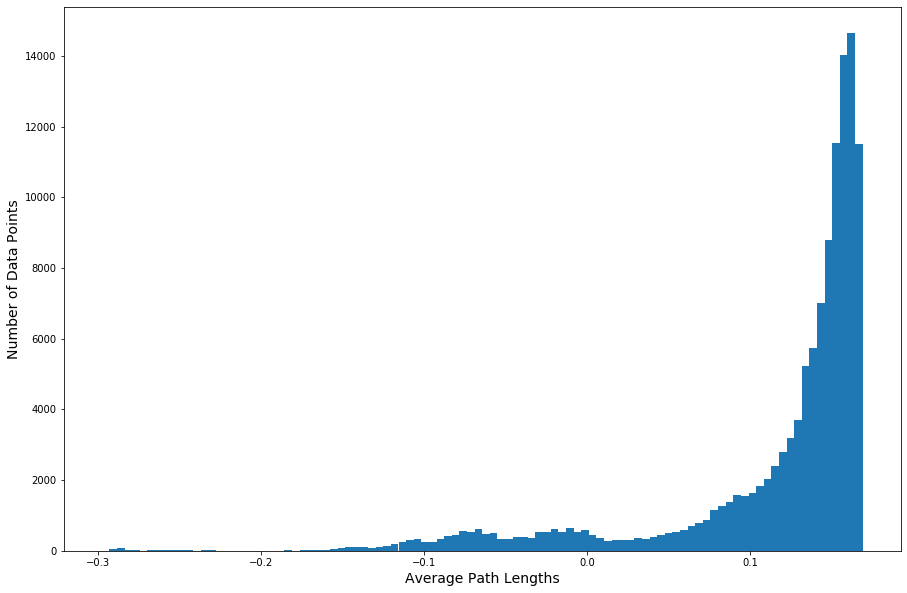

In [9]:
anomaly_scores = isolation_forest.decision_function(x_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [10]:
anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies, matches)
print("AUC: {:.2%}".format(auc))

AUC: 98.89%


In [11]:
anomaly_scores_test = isolation_forest.decision_function(x_test)
anomalies_test = anomaly_scores_test > -0.19
matches_test = y_test == list(encoded.classes_).index('normal.')
auc_test = roc_auc_score(anomalies_test, matches_test)
print("AUC: {:.2%}".format(auc_test))

AUC: 98.59%


In [12]:
tn, fp, fn, tp = confusion_matrix(matches_test, anomalies_test).ravel()
print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp))

TN: 317, FP: 361, FN: 8, TP: 99314
